In [35]:
!pip install xgboost

Looking in indexes: https://ci-repo.aexp.com/repository/pypi/simple


In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns

Data collection and preprocessing


In [23]:
from sklearn.datasets import load_boston
dataset = load_boston()
boston_housing_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
boston_housing_df['Price'] = dataset.target

In [24]:
boston_housing_df.head

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
boston_housing_df.shape

(506, 14)

In [39]:
boston_housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [40]:
boston_housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Separating data 

In [41]:
X = boston_housing_df.drop('Price', axis = 1)
Y = boston_housing_df['Price']

In [42]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [43]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


Standarising data 

In [44]:
scaler = StandardScaler()

In [45]:
X = scaler.fit_transform(X)

In [46]:
print(X)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


Training and Testing 

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1,random_state = 2) 
#not stratifying since it's regression not classification

In [85]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 13) (51, 13) (455,) (51,)


Training the Model 

In [86]:
model = XGBRegressor()

In [87]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluating the Model 

In [88]:
X_train_prediction = model.predict(X_train)

We check accuracy of classifiying in Classification problems

For regression, we check Errors like R-Sqaured error, mean squared errors

In [89]:
X_rsqaured = metrics.r2_score(X_train_prediction, Y_train)
X_mean_squared_error = metrics.mean_squared_error(X_train_prediction, Y_train)

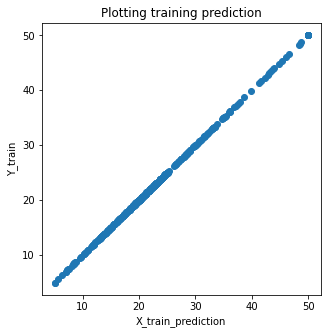

In [90]:
plt.figure(figsize = (5,5))
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Y_train')
plt.title('Plotting training prediction')
plt.show() 

Data points are close to each other : Prediction is pretty good in training data 

In [91]:
print('R square error of training data is : ', X_rsqaured)
print('Mean squared error of training data is :', X_mean_squared_error)

R square error of training data is :  0.9999877199585455
Mean squared error of training data is : 0.0010495386492083128


In [92]:
X_test_prediction = model.predict(X_test)

In [93]:
X_rsqaured2 = metrics.r2_score(X_test_prediction, Y_test)
X_mean_squared_error2 = metrics.mean_squared_error(X_test_prediction, Y_test)

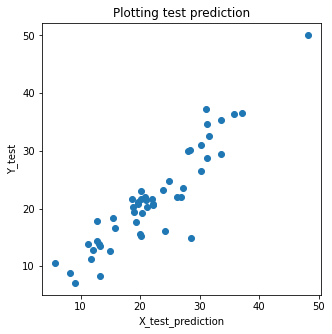

In [94]:
plt.figure(figsize = (5,5))
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_test_prediction')
plt.ylabel('Y_test')
plt.title('Plotting test prediction')
plt.show() 

Data points are not that close in testing data 

In [95]:
print('R square error of testing data is : ', X_rsqaured)
print('Mean squared error of testing data is :', X_mean_squared_error)

R square error of testing data is :  0.9999877199585455
Mean squared error of testing data is : 0.0010495386492083128
